In [3]:
import geojson
import geopandas
import osmnx

In [4]:
with open('/Users/samyounes/Downloads/precincts-with-results.geojson') as f:
    gjdf=geopandas.read_file(f, rows=10000)



In [5]:
gjdf

,GEOID,votes_dem,votes_rep,votes_total,votes_per_sqkm,pct_dem_lead,geometry
0,05047-1-A (Oz Wd 1),79,279,366,54.2,-54.6,"MULTIPOLYGON (((-93.88536 35.48376, -93.88405 ..."
1,05149-11 - Dutch Creek,6,31,37,0.3,-67.6,"POLYGON ((-93.56912 34.94763, -93.57895 34.947..."
2,05081-Franklin Township,53,383,450,3.8,-73.3,"POLYGON ((-93.98600 33.74165, -93.98546 33.741..."
3,05027-McNeil City,64,68,138,41.9,-2.9,"POLYGON ((-93.19438 33.34718, -93.19373 33.347..."
4,05027-Taylor Township,67,342,423,1.7,-65.0,"POLYGON ((-93.45912 33.01858, -93.46310 33.018..."
...,...,...,...,...,...,...,...
9995,06037-6220224A,1561,1182,2794,316.6,13.6,"POLYGON ((-118.47696 34.43809, -118.48079 34.4..."
9996,06037-6230004A,1181,620,1846,1810.8,30.4,"POLYGON ((-118.09284 33.94580, -118.09247 33.9..."
9997,06037-6230005A,513,232,758,174.9,37.1,"POLYGON ((-118.04596 33.93987, -118.04604 33.9..."
9998,06037-6230005C,0,3,3,650.8,-100.0,"POLYGON ((-118.07261 33.93156, -118.07261 33.9..."


In [47]:
import numpy as np
from shapely.geometry import Polygon, MultiPolygon

features=(gjdf[['GEOID','geometry']])
avg_coords=[]
names=[]
for i in range(len(features['geometry'])):
    names.append(features['GEOID'][i])
    feature=features['geometry'][i]
    if(isinstance(feature,Polygon)):
        coords = list(feature.exterior.coords)
        ys,xs = np.array(coords).T
        average = (np.mean(xs),np.mean(ys))
        avg_coords.append(average)
    if(isinstance(feature,MultiPolygon)):
        #all_coords=[]
        for i in range(len(feature.geoms)):
          # all_coords.append(list(feature.geoms[i].exterior.coords))
            coords = list(feature.geoms[i].exterior.coords)
        ys,xs=np.array(coords).T
        average=(np.mean(xs),np.mean(ys))
        avg_coords.append(average)

#making dictionary of GEOID and average coordinates

dict={}
for i in range(len(names)):
    dict[names[i]]=(avg_coords[i][0], avg_coords[i][1])
        

In [48]:
len(avg_coords)
avg_coords[:10]

xs=[]
ys=[]
for i in avg_coords:
    xs.append(i[0])
    ys.append(i[1])

len(xs)

10000

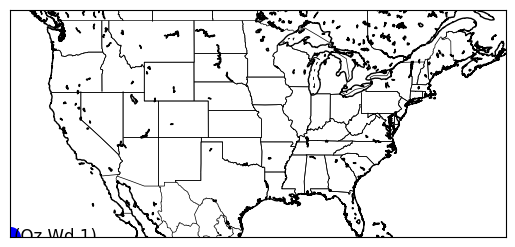

In [57]:
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.pyplot as plt
import networkx as nx
m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

mx, my = m(xs, ys)

graph=nx.Graph()
graph.add_node(names[0])

pos={}
pos['a']=(mx[0],my[0])
pos['b']=(mx[1],my[1])

nx.draw_networkx(graph,dict,node_size=200,node_color='blue')
m.drawcoastlines()
m.drawcountries()
m.drawstates()


plt.show()

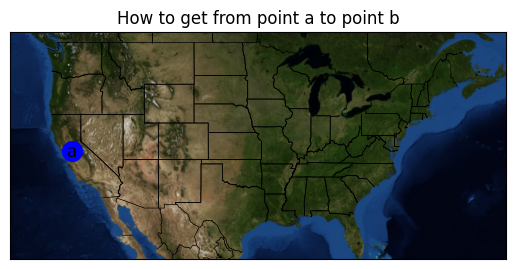

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

# position in decimal lat/lon
lats=[37.96,42.82]
lons=[-121.29,-73.95]
# convert lat and lon to map projection
mx,my=m(lons,lats)

# The NetworkX part
# put map projection coordinates in pos dictionary
G=nx.Graph()
G.add_node('a')
pos={}
pos['a']=(mx[0],my[0])
pos['b']=(mx[1],my[1])
# draw
nx.draw_networkx(G,pos,node_size=200,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('How to get from point a to point b')
plt.show()

In [41]:
avg_coords[0][0]

-93.8396680006466

In [42]:
avg_coords[0][1]

35.48916421942343

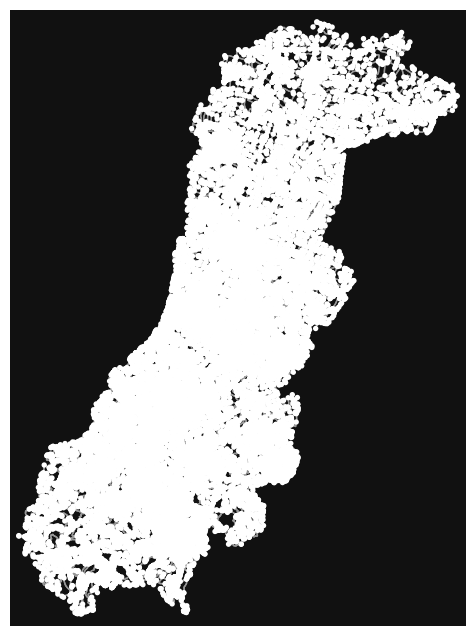

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [100]:
osmnx.plot_graph(osmnx.graph_from_place('Modena, Italy'))

In [80]:

if type(features[1])=='shapely.geometry.polygon.Polygon':
    print('ok')

In [85]:
isinstance(features[0],MultiPolygon)

True

In [67]:
features=(gjdf['geometry'])[0]
#features[0]
features
type(features)

shapely.geometry.multipolygon.MultiPolygon

In [70]:
features.geoms[4].exterior.coords

In [69]:
len(features.geoms)

5